# Moving Average Smoothing

In [2]:
import pandas as pd
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [4]:
df = pd.read_csv(
    "data/daily-total-female-births.csv", 
    index_col="Date", 
    parse_dates=["Date"]
)
df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [5]:
rolling = df.rolling(window=3)
rolling_mean = rolling.mean()
rolling_mean.head()

,Births
Date,
1959-01-01,NaN
1959-01-02,NaN
1959-01-03,32.333333
1959-01-04,31.000000
1959-01-05,35.000000


<AxesSubplot:xlabel='Date'>

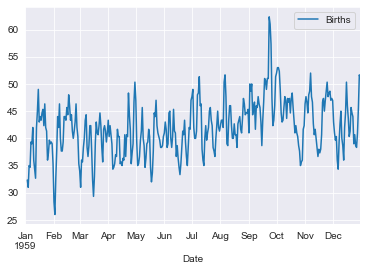

In [7]:
rolling_mean.plot()

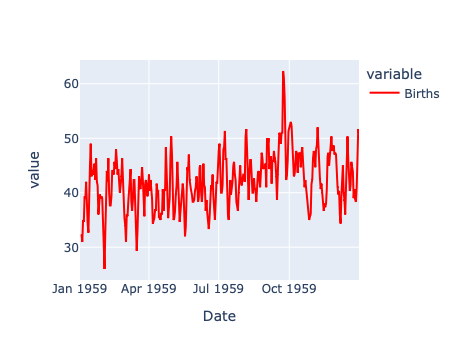

In [10]:
fig = px.line(rolling_mean, color_discrete_sequence=["red"])
fig.show()

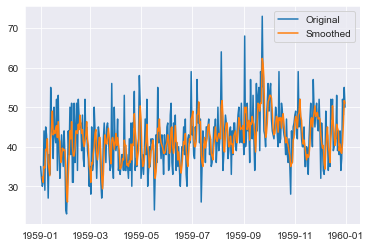

In [12]:
plt.plot(df, label="Original")
plt.plot(rolling_mean, label="Smoothed")
plt.legend()

# Moving Average as Feature Engineering

In [13]:
width = 3
lag_1 = df.shift(1)
lag_3 = df.shift(width - 1)
window = lag_3.rolling(window=width)
means = window.mean()
data = pd.concat([means, lag_1, df], axis=1)
data.columns = ["mean", "t", "t-1"]
data.head()

,mean,t,t-1
Date,,,
1959-01-01,NaN,NaN,35
1959-01-02,NaN,35.0,32
1959-01-03,NaN,32.0,30
1959-01-04,NaN,30.0,31
1959-01-05,32.333333,31.0,44
